## 1. Import Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from mlxtend.plotting import plot_decision_regions

sns.set_theme()

## 2. Load Dataset

I will use the breast cancer dataset from `sklearn.datasets` for this binary classification example. This dataset comes from sklearn and includes data/info about cancerous sites, with each row representing a different cancerous site on an individual patient. Columns include things like radius, texture, perimeter, area, smoothness, symmetry, and more -- all ways that a medical professional would classify a cancerous site. 

We can use some of these categories/columns to draw conclusions and analyze trends about cancerous sites, such as whether the radius, texture, and smoothness corresponds to severity of the cancerous site. 

In [31]:
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df)
df['target'] = data.target
df['target']

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

## 3. Preprocess Data

I will convert the target to -1 and 1 to match the classic Perceptron formulation and select two features. It was originally set to 0 and 1, but converting this to -1 and 1 is a very quick, easy, and necessary adjustment.

The two features that I will select are worst perimeter and worst area. These two categories provide additional information about the size of a patient's cancerous site. 


In [32]:
df['target'] = df['target'].replace({0: -1, 1: 1})
X = df[["worst perimeter", "worst area"]].iloc[:100].values
y = df['target'].iloc[:100].values
print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

[[ 184.6  2019.  ]
 [ 158.8  1956.  ]
 [ 152.5  1709.  ]
 [  98.87  567.7 ]
 [ 152.2  1575.  ]
 [ 103.4   741.6 ]
 [ 153.2  1606.  ]
 [ 110.6   897.  ]
 [ 106.2   739.3 ]
 [  97.65  711.4 ]
 [ 123.8  1150.  ]
 [ 136.5  1299.  ]
 [ 151.7  1332.  ]
 [ 112.    876.5 ]
 [ 108.8   697.7 ]
 [ 124.1   943.2 ]
 [ 123.4  1138.  ]
 [ 136.8  1315.  ]
 [ 186.8  2398.  ]
 [  99.7   711.2 ]
 [  96.09  630.5 ]
 [  65.13  314.9 ]
 [ 125.1   980.9 ]
 [ 188.   2615.  ]
 [ 177.   2215.  ]
 [ 152.4  1461.  ]
 [ 122.4   896.9 ]
 [ 139.9  1403.  ]
 [ 149.3  1269.  ]
 [ 134.9  1227.  ]
 [ 160.5  1670.  ]
 [ 119.4   888.7 ]
 [ 136.1  1344.  ]
 [ 161.4  1813.  ]
 [ 132.7  1261.  ]
 [ 133.5  1229.  ]
 [ 116.2   799.6 ]
 [  84.46  545.9 ]
 [  95.54  698.8 ]
 [ 107.3   740.4 ]
 [ 102.5   787.9 ]
 [  87.22  514.  ]
 [ 177.4  1651.  ]
 [ 113.1   907.2 ]
 [ 105.5   740.7 ]
 [ 150.6  1567.  ]
 [  57.26  242.2 ]
 [ 102.8   759.4 ]
 [  89.88  582.6 ]
 [  99.    698.8 ]
 [  82.98  516.5 ]
 [  96.08  656.7 ]
 [  83.67  5

NameError: name 'train_test_split' is not defined

## 4. Implement Custom Perceptron

Following the course modules and examples provided, I will create my own Perceptron class with adjustable learning rate and epoch count.


In [33]:
class Perceptron:
    def __init__(self, eta=0.5, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update * xi
                self.w_[-1] -= update
                errors += int(update != 0)
            self.errors.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


## 5. Train the Perceptron
Here, I implement the model and fit it to the data.


In [34]:
percep = Perceptron(eta=0.5, epochs=175)
percep.train(X, y)

## 6. Visualize Decision Boundary
Using `mlxtend`, I can see the classifier's learned decision regions. The visualization is a plot with a clearly defined decision boundary. The features (Worst Perimeter and Worst Area) are positioned on the x and y axes, respectively. Each plotted point represents a row from the dataframe, with an orange triangle representing 1 in the target column and a blue square representing -1 in the target column. 


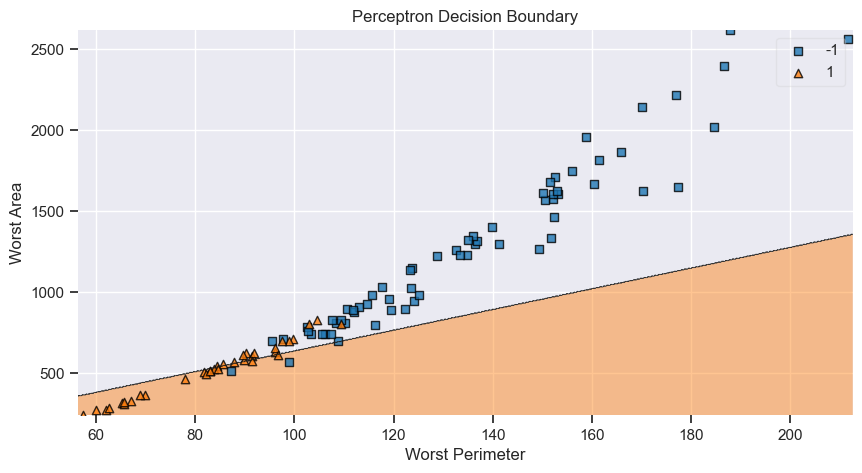

In [35]:
plt.figure(figsize=(10, 5))
plot_decision_regions(X, y, clf=percep)
plt.xlabel("Worst Perimeter")
plt.ylabel("Worst Area")
plt.title("Perceptron Decision Boundary")
plt.show()


## 7. Plot Learning Curve
I use a rolling average to smooth the number of misclassifications per epoch. The visualization shows how the number of misclassifications decreases and smooths/flattens out as the number of epochs increases. 


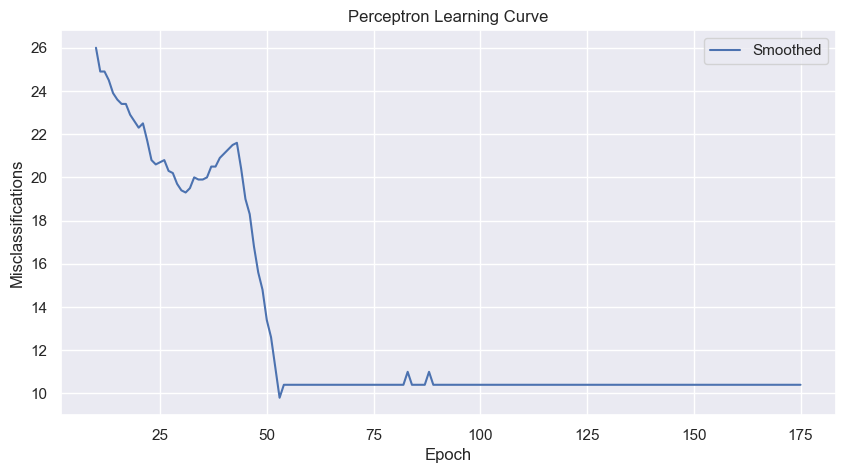

In [36]:
errors_smooth = pd.Series(percep.errors).rolling(window=10).mean()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(errors_smooth)+1), errors_smooth, label="Smoothed")
plt.xlabel("Epoch")
plt.ylabel("Misclassifications")
plt.title("Perceptron Learning Curve")
plt.grid(True)
plt.legend()
plt.show()


## 8. Try Different Feature Pair
I repeat the above analysis with a different pair of features. This allows me to improve my familiarity with Perceptron Decision Boundaries, as well as analyze whether setting different features leads to a more or less clearly defined decision boundary. The features (Worst Symmetry and Worst Concavity) are positioned on the x and y axes, respectively. Each plotted point represents a row from the dataframe, with an orange triangle representing 1 in the target column and a blue square representing -1 in the target column. 

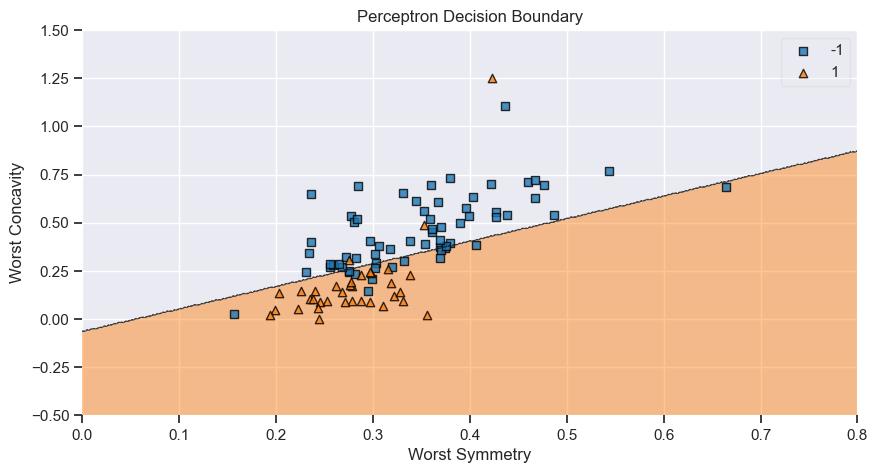

In [37]:
X2 = df[["worst symmetry", "worst concavity"]].iloc[:100].values
percep = Perceptron(eta=0.5, epochs=200)
percep.train(X2, y)

plt.figure(figsize=(10, 5))
plot_decision_regions(X2, y, clf=percep)
plt.xlabel("Worst Symmetry")
plt.ylabel("Worst Concavity")
plt.xlim(0, 0.8)
plt.ylim(-0.5, 1.5)
plt.title("Perceptron Decision Boundary")
plt.show()


## 9. Plot Learning Curve

Once again, I use a rolling average to smooth the number of misclassifications per epoch. The visualization shows how the number of misclassifications decreases and smooths/flattens out as the number of epochs increases. Unlike the first attempt, this one has a little more volatility as epochs > 100. The first visualization flattened/smoothed out when epochs > 100, and while this one does have the volatility decrease a little, it still has some fluctuation. 

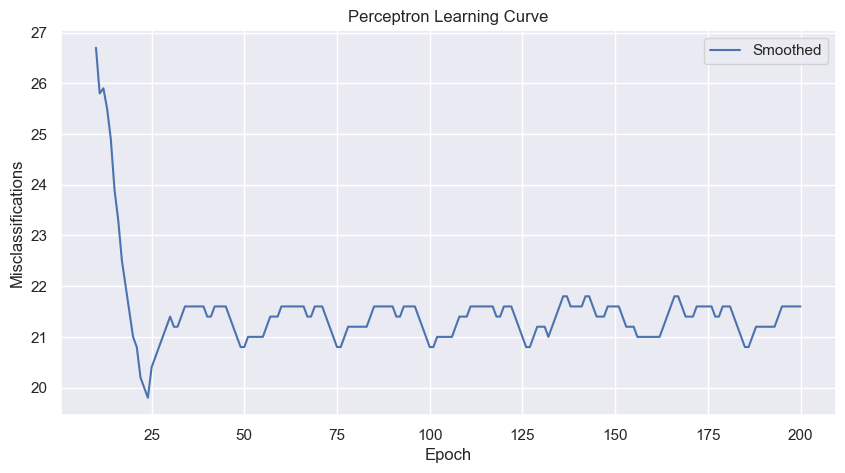

In [38]:
errors_smooth = pd.Series(percep.errors).rolling(window=10).mean()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(errors_smooth)+1), errors_smooth, label="Smoothed")
plt.xlabel("Epoch")
plt.ylabel("Misclassifications")
plt.title("Perceptron Learning Curve")
plt.grid(True)
plt.legend()
plt.show()
